In [183]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
from matplotlib import ticker

In [220]:
def scan_hdf5(path, recursive=True, tab_step=2):
    def scan_node(g, tabs=0):
        print(' ' * tabs, g.name)
        for k, v in g.items():
            if isinstance(v, h5.Dataset):
                print(' ' * tabs + ' ' * tab_step + ' -', v.name)
            elif isinstance(v, h5.Group) and recursive:
                scan_node(v, tabs=tabs + tab_step)
    with h5.File(path, 'r') as f:
        scan_node(f)


def read_and_scan(*filenames):
    #scan_hdf5(filename)
    h5_files = [h5.File(filename) for filename in filenames]
    return h5_files


def current_frequency_amplitude(h5_block):
    frame = {
        'current' : np.asarray(h5_block['entry']['data0']['current']),
        'frequency' : np.asarray(h5_block['entry']['data0']['frequency']),
        'amplitude' : np.asarray(h5_block['entry']['data0']['amplitude'])
    }
    
    return frame


def current_frequency_mesh(current_axes,frequency_axes):
    current_mesh, frequency_mesh = np.meshgrid(current_axes, frequency_axes)
    return current_mesh, frequency_mesh


def contour_plot(current, frequency, amplitude, maximum_y = 9):
    params = {'mathtext.default': 'regular' }          
    plt.rcParams.update(params)

    plt.contourf(current,frequency/1e9, amplitude.T, 1000, cmap = plt.get_cmap('magma_r'))

    cbar = plt.colorbar( format = '%.1f')
    cbar.set_label("$S_{11}$ (Normalised Amplitude)")
    plt.xlabel('Current /A')
    plt.ylabel('Frequency /GHz')
    plt.ylim(ymin = 2, ymax=maximum_y)
    plt.xlim(xmin = -2, xmax = 1.5)


def background_separation(sample_amplitude, background_amplitude):
    return 20*np.log10(sample_amplitude/sample_amplitude[0]) - 20*np.log10(np.mean(background_amplitude/background_amplitude[0]))


def main(*filenames, background_removal= False):
    h5_files = read_and_scan(*filenames)

    sample = current_frequency_amplitude(h5_files[0])
    background = current_frequency_amplitude(h5_files[1])
    current, frequency = current_frequency_mesh(sample['current'], sample['frequency'])

    if background_removal:
        foreground_amplitude = background_separation(sample['amplitude'], background['amplitude'])
        contour_plot(current, frequency, foreground_amplitude)
    
    else:
        contour_plot(current,frequency, 20*np.log10(sample['amplitude']))
        
    return

In [221]:
sample_filename = ("sample_files/sample 3 1-15GHz -4.1 to 4.1A.h5")
non_sample_filename = ("sample_files/3 to 15GHz, -4.1A to 4.1A, sample face up.h5")

filenames = [sample_filename, non_sample_filename]

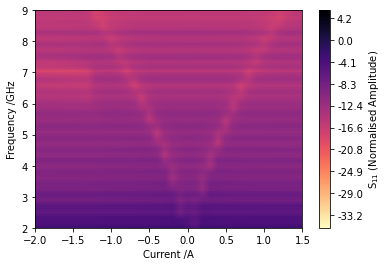

In [222]:
main(*filenames)

In [210]:
read_and_scan(*filenames)

[<HDF5 file "sample 3 1-15GHz -4.1 to 4.1A.h5" (mode r)>,
 <HDF5 file "3 to 15GHz, -4.1A to 4.1A, sample face up.h5" (mode r)>]

In [225]:
file_paths = {
        'sample' : 'sample_files/yig sphere 3-15GHz -4.1 to 4.1A.h5',
        'background' : 'sample_files/3 to 15GHz, -4.1A to 4.1A, sample face up.h5'
    }

In [226]:
read_and_scan(*file_paths.values())

[<HDF5 file "yig sphere 3-15GHz -4.1 to 4.1A.h5" (mode r)>,
 <HDF5 file "3 to 15GHz, -4.1A to 4.1A, sample face up.h5" (mode r)>]